- This notebook will contain the 4 train datasets. 
- I will make each dataset ready to use with the best formats and relevant columns.
- after a short cleaning, I'll start to merge the files and preper them to modeling.


<p><a name="libraries"></a></p>


# import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [62]:
pd.set_option('display.max_columns', 50)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [63]:
inpatient_path   = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient_path  = '../Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train_path       = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
beneficiary_path = '../Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'

# read inpatient outpatient and train files data
inpatient  = pd.read_csv(inpatient_path).rename(columns=clear_cols)
outpatient = pd.read_csv(outpatient_path).rename(columns=clear_cols)
train       = pd.read_csv(train_path).rename(columns=clear_cols)
bene       = pd.read_csv(beneficiary_path).rename(columns=clear_cols)

<p><a name="inpatient"></a></p>

<!-- ### Inpatient -->
<center>load the <b>trainInpatient</b> file, print out the shape and column names</center>

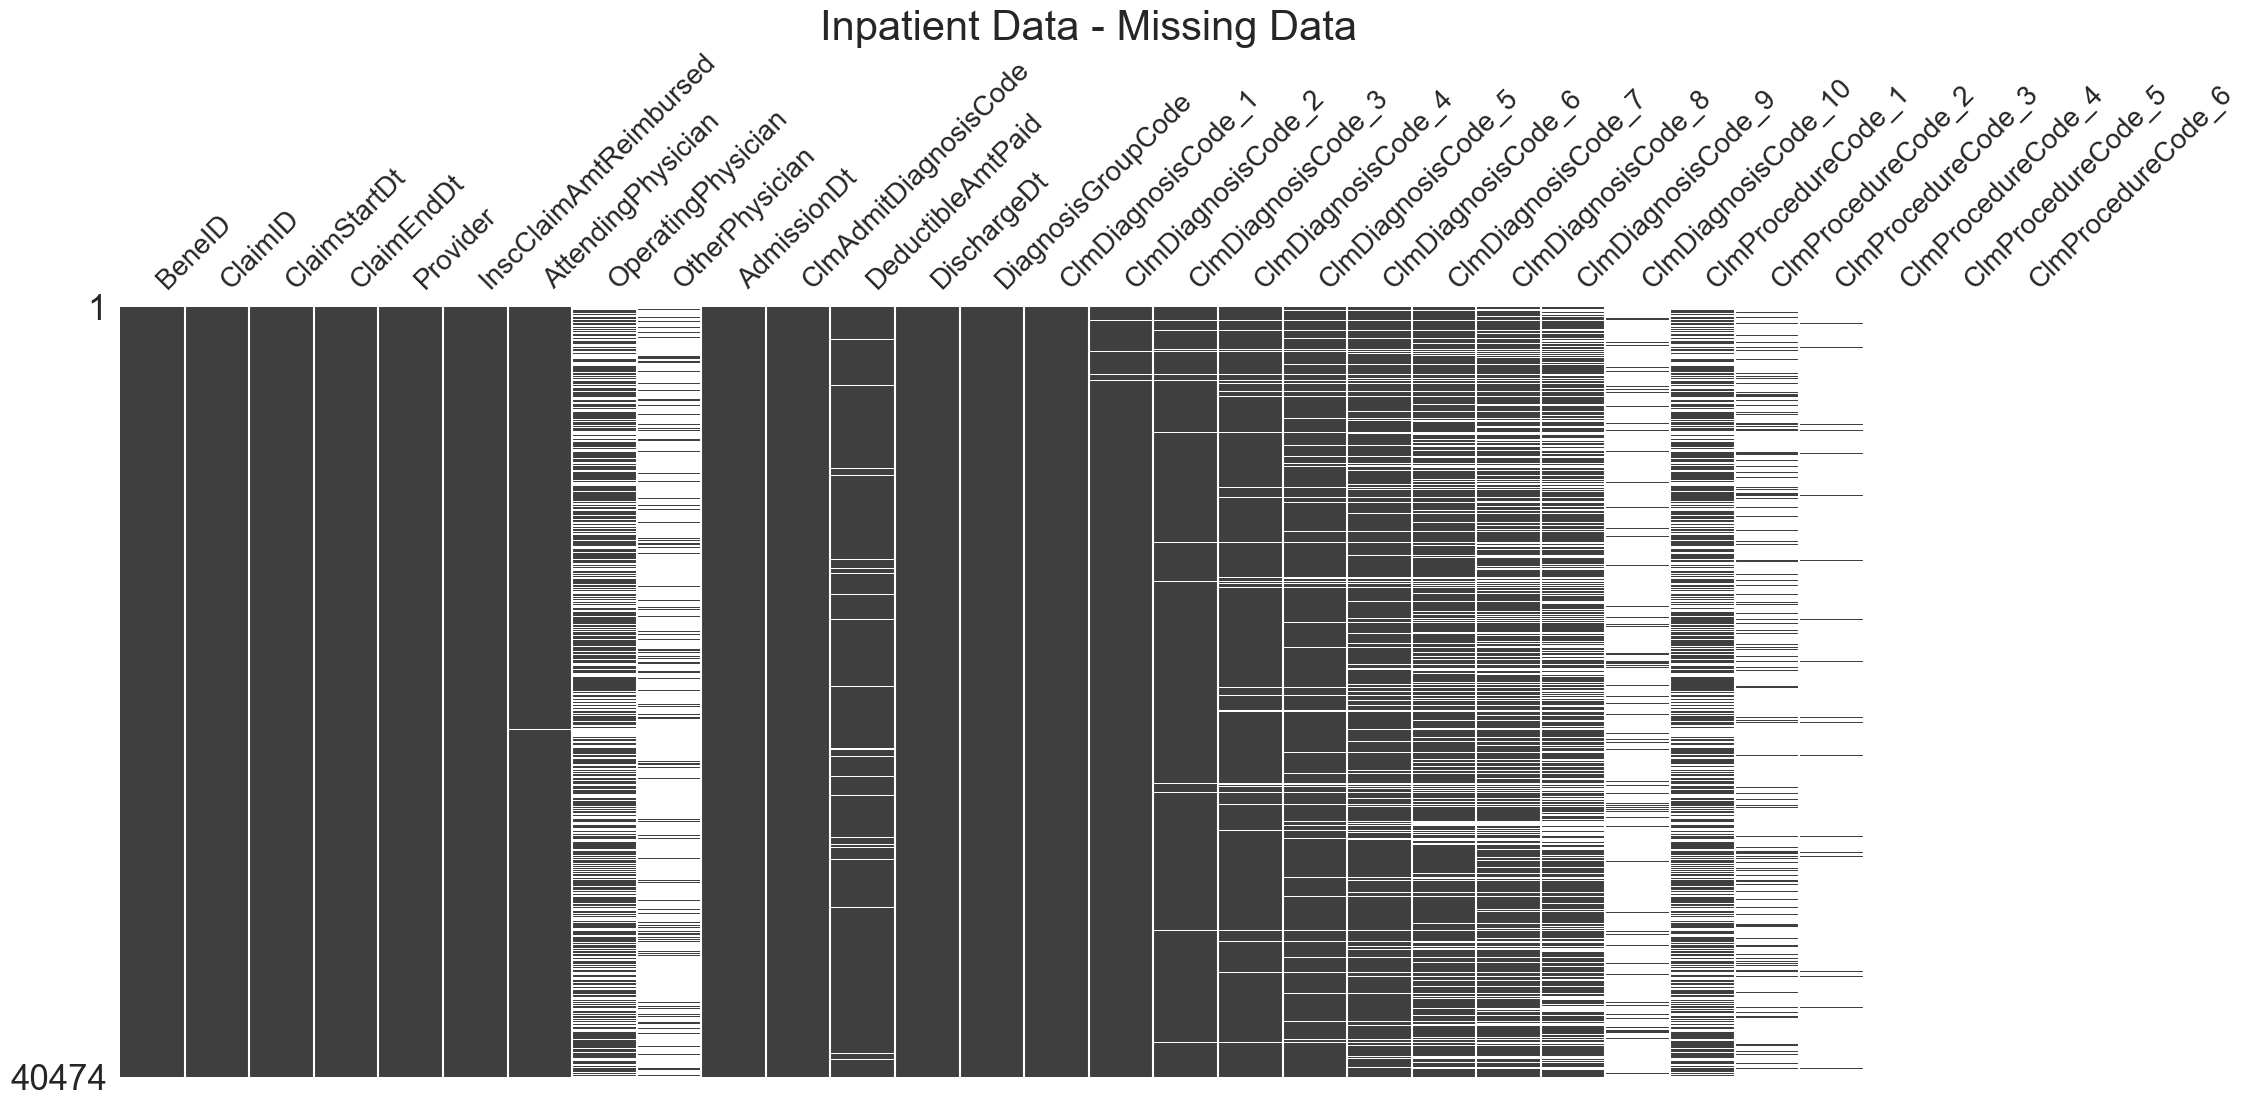

In [64]:
msno.matrix(inpatient, sparkline=False, fontsize=20)
plt.title('Inpatient Data - Missing Data', fontsize=30)
plt.show()

In [65]:
print(f"inpatient data shape is: {inpatient.shape}")
inpatient.columns

inpatient data shape is: (40474, 30)


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [66]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [67]:
# Check for missing values
# and making sure the data types are relevant to the values inside the columns
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [68]:
# For the DiagnosisGroupCode I wanted to convert the datadtype into int,
# but I have one value as "OTH", I'll convert it to 999999.
inpatient['DiagnosisGroupCode'].unique()

array(['201', '750', '883', '067', '975', '597', '390', '379', '294',
       '262', '857', '876', '030', '202', '165', '482', '882', '226',
       '627', '346', '167', '853', '247', '198', '688', '175', '240',
       '206', '500', '712', '897', '101', '307', '255', '183', '302',
       '190', '884', '655', '368', '548', '186', '256', '216', '535',
       '166', '095', '022', '986', '357', '637', '102', '630', '409',
       '316', '241', '230', '208', '541', '624', '869', '698', '653',
       '440', '575', '654', '381', '288', '344', '663', '187', '306',
       '225', '093', '184', '078', '895', '337', '197', '872', '199',
       '281', '200', '871', '887', '351', '643', '289', '094', '592',
       '295', '484', '242', '618', '485', '290', '673', '421', '909',
       '229', '308', '453', '638', '454', '840', '558', '377', '940',
       '259', '311', '231', '461', '951', '303', '714', '446', '207',
       '356', '867', '434', '620', '180', '866', '553', '205', '561',
       '194', '031',

In [69]:
inpatient['DiagnosisGroupCode'] = inpatient['DiagnosisGroupCode'].replace('OTH', 999999)
inpatient['DiagnosisGroupCode'] = inpatient['DiagnosisGroupCode'].astype(int)
inpatient['DiagnosisGroupCode'].value_counts().reset_index().sort_values(ascending=False, by='DiagnosisGroupCode')

,DiagnosisGroupCode,count
81,999999,113
569,999,20
559,998,23
563,989,22
549,988,25
...,...,...
624,4,14
576,3,19
580,2,18
665,1,10


In [70]:
# convert all relevant columns to datetime for later analysis
inpatient['ClaimStartDt']= pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt']  = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['AdmissionDt'] = pd.to_datetime(inpatient['AdmissionDt'])
inpatient['DischargeDt'] = pd.to_datetime(inpatient['DischargeDt'])
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [71]:
inpatient[['BeneID', 'Provider']]

,BeneID,Provider
0,BENE11001,PRV55912
1,BENE11001,PRV55907
2,BENE11001,PRV56046
3,BENE11011,PRV52405
4,BENE11014,PRV56614
...,...,...
40469,BENE159167,PRV53671
40470,BENE159175,PRV54981
40471,BENE159177,PRV56588
40472,BENE159177,PRV56575


In [72]:
# Following Vinod way, but I still get the same results.
inpatient[['BeneID', 'Provider']].drop_duplicates()

,BeneID,Provider
0,BENE11001,PRV55912
1,BENE11001,PRV55907
2,BENE11001,PRV56046
3,BENE11011,PRV52405
4,BENE11014,PRV56614
...,...,...
40468,BENE159167,PRV53671
40470,BENE159175,PRV54981
40471,BENE159177,PRV56588
40472,BENE159177,PRV56575


<center>load the <b>trainOutpatient</b> file, print out the shape and column names</center>

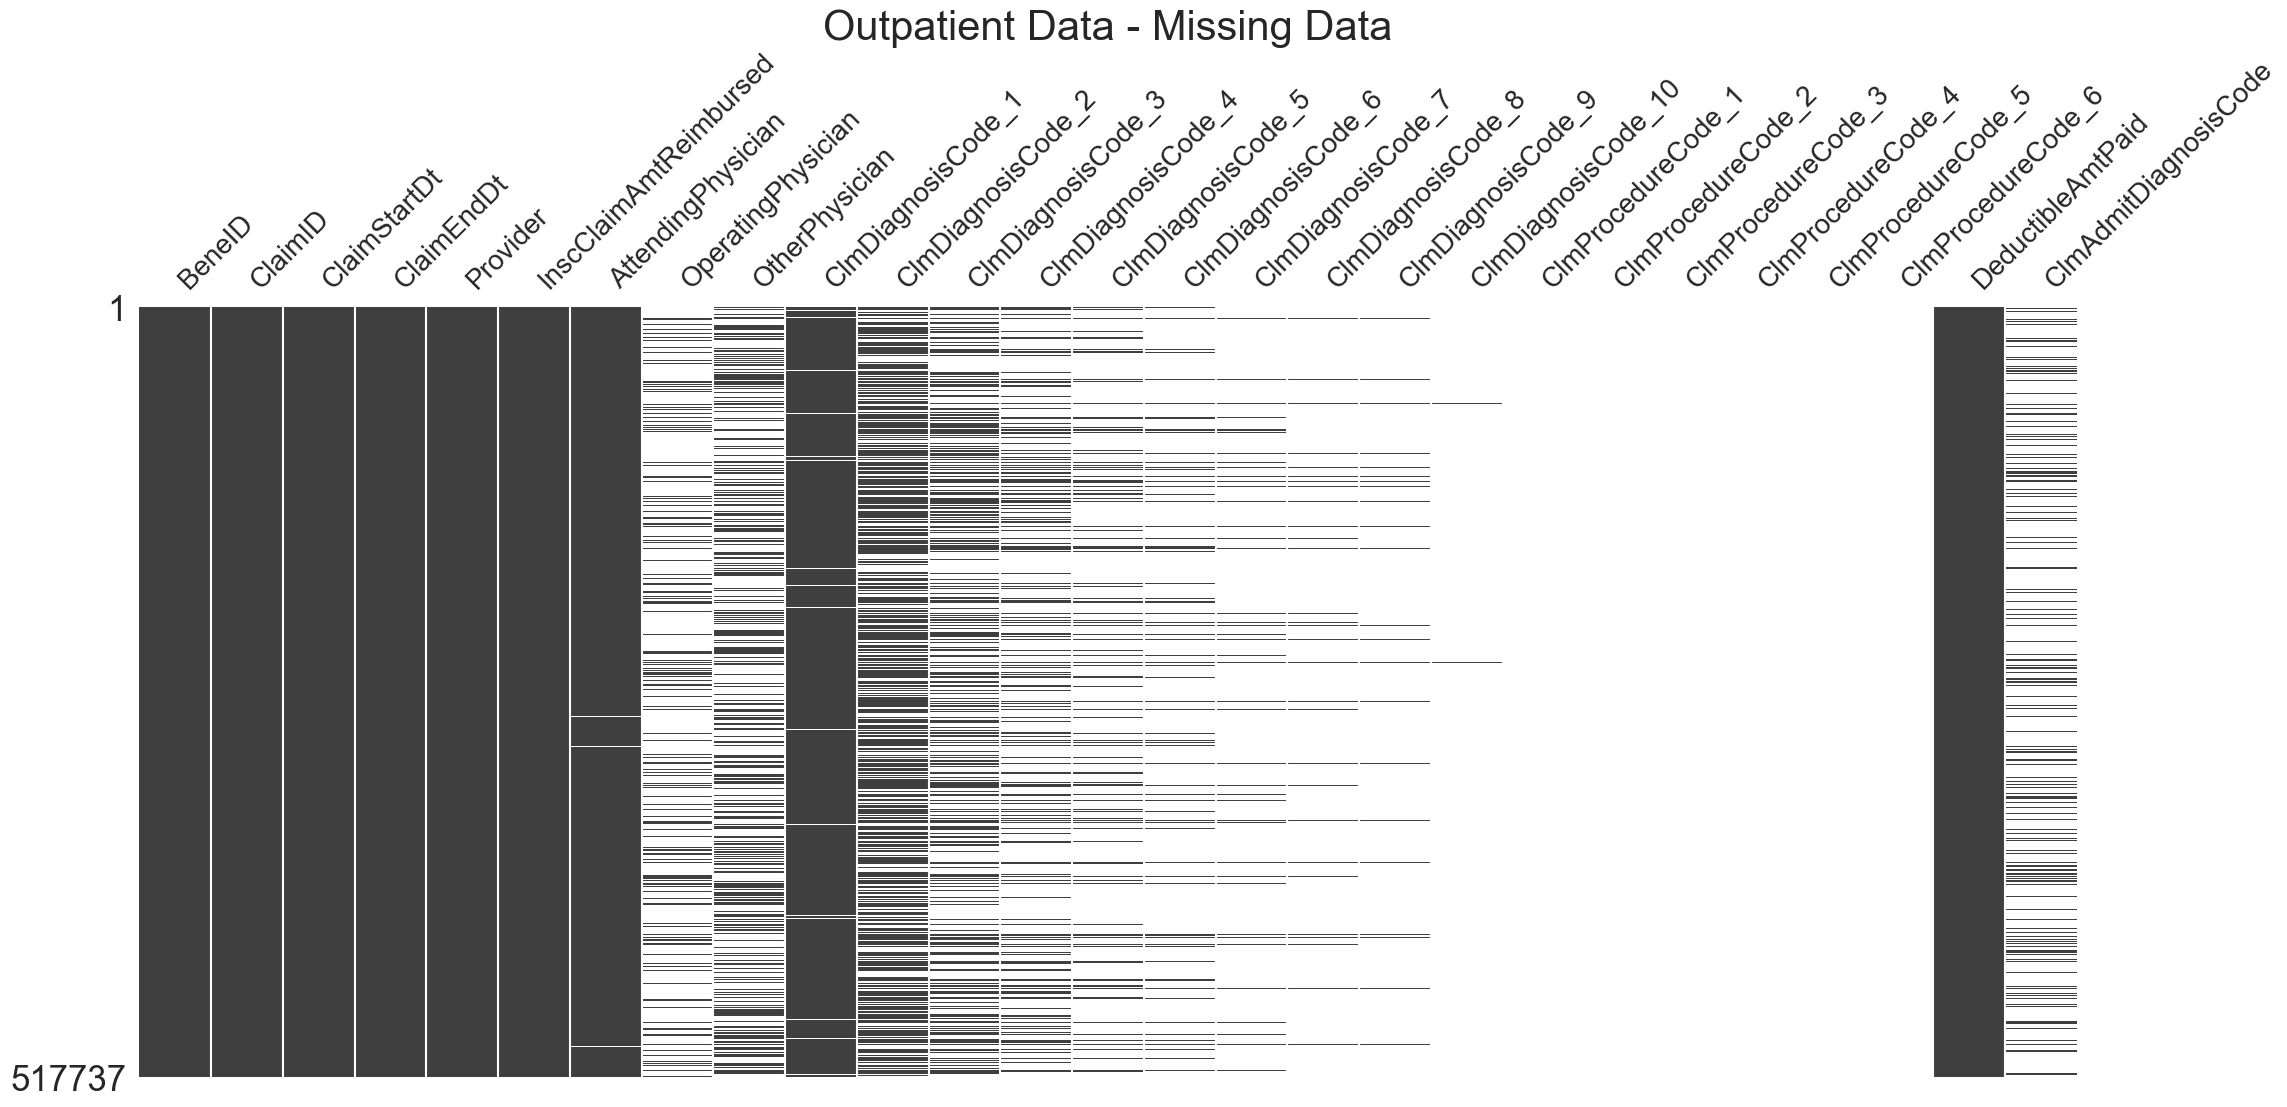

In [73]:
msno.matrix(outpatient, sparkline=False, fontsize=20)
plt.title('Outpatient Data - Missing Data', fontsize=30)
plt.show()

In [74]:
print(f"outpatient data shape is: {outpatient.shape}")
outpatient.columns

outpatient data shape is: (517737, 27)


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [75]:
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [76]:
# check for missing values
# and making sure the data types are relevant to the values inside the columns
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [77]:
# convert dates to datetime format 
outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'])
outpatient['ClaimEndDt']   = pd.to_datetime(outpatient['ClaimEndDt'])
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  517737 non-null  object        
 1   ClaimID                 517737 non-null  object        
 2   ClaimStartDt            517737 non-null  datetime64[ns]
 3   ClaimEndDt              517737 non-null  datetime64[ns]
 4   Provider                517737 non-null  object        
 5   InscClaimAmtReimbursed  517737 non-null  int64         
 6   AttendingPhysician      516341 non-null  object        
 7   OperatingPhysician      90617 non-null   object        
 8   OtherPhysician          195046 non-null  object        
 9   ClmDiagnosisCode_1      507284 non-null  object        
 10  ClmDiagnosisCode_2      322357 non-null  object        
 11  ClmDiagnosisCode_3      203257 non-null  object        
 12  ClmDiagnosisCode_4      125596

In [78]:
outpatient[['BeneID', 'Provider']]

,BeneID,Provider
0,BENE11002,PRV56011
1,BENE11003,PRV57610
2,BENE11003,PRV57595
3,BENE11004,PRV56011
4,BENE11004,PRV56011
...,...,...
517732,BENE159198,PRV53699
517733,BENE159198,PRV53702
517734,BENE159198,PRV53676
517735,BENE159198,PRV53689


In [79]:
# Following Vinod's way, but still get the same results
outpatient[['BeneID', 'Provider']].drop_duplicates()

,BeneID,Provider
0,BENE11002,PRV56011
1,BENE11003,PRV57610
2,BENE11003,PRV57595
3,BENE11004,PRV56011
10,BENE11004,PRV55951
...,...,...
517726,BENE159198,PRV53672
517728,BENE159198,PRV53699
517729,BENE159198,PRV53670
517733,BENE159198,PRV53702


In [177]:
outpatient['Provider'].nunique()

5012

In [178]:
inpatient['Provider'].nunique()

2092

In [181]:
inpatient['BeneID'].nunique()
outpatient['BeneID'].nunique()

133980

<center>load the <b>trainFile</b> file, print out the shape and column names</center>

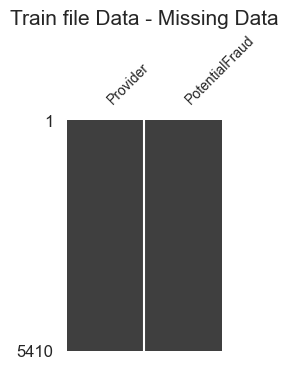

In [80]:
msno.matrix(train, sparkline=False, figsize=(2,3),fontsize=10)
plt.title('Train file Data - Missing Data', fontsize=15)
plt.show()

In [81]:
print(f"train data shape is: {train.shape}")
train.columns

train data shape is: (5410, 2)


Index(['Provider', 'PotentialFraud'], dtype='object')

---

# Beneficiary file

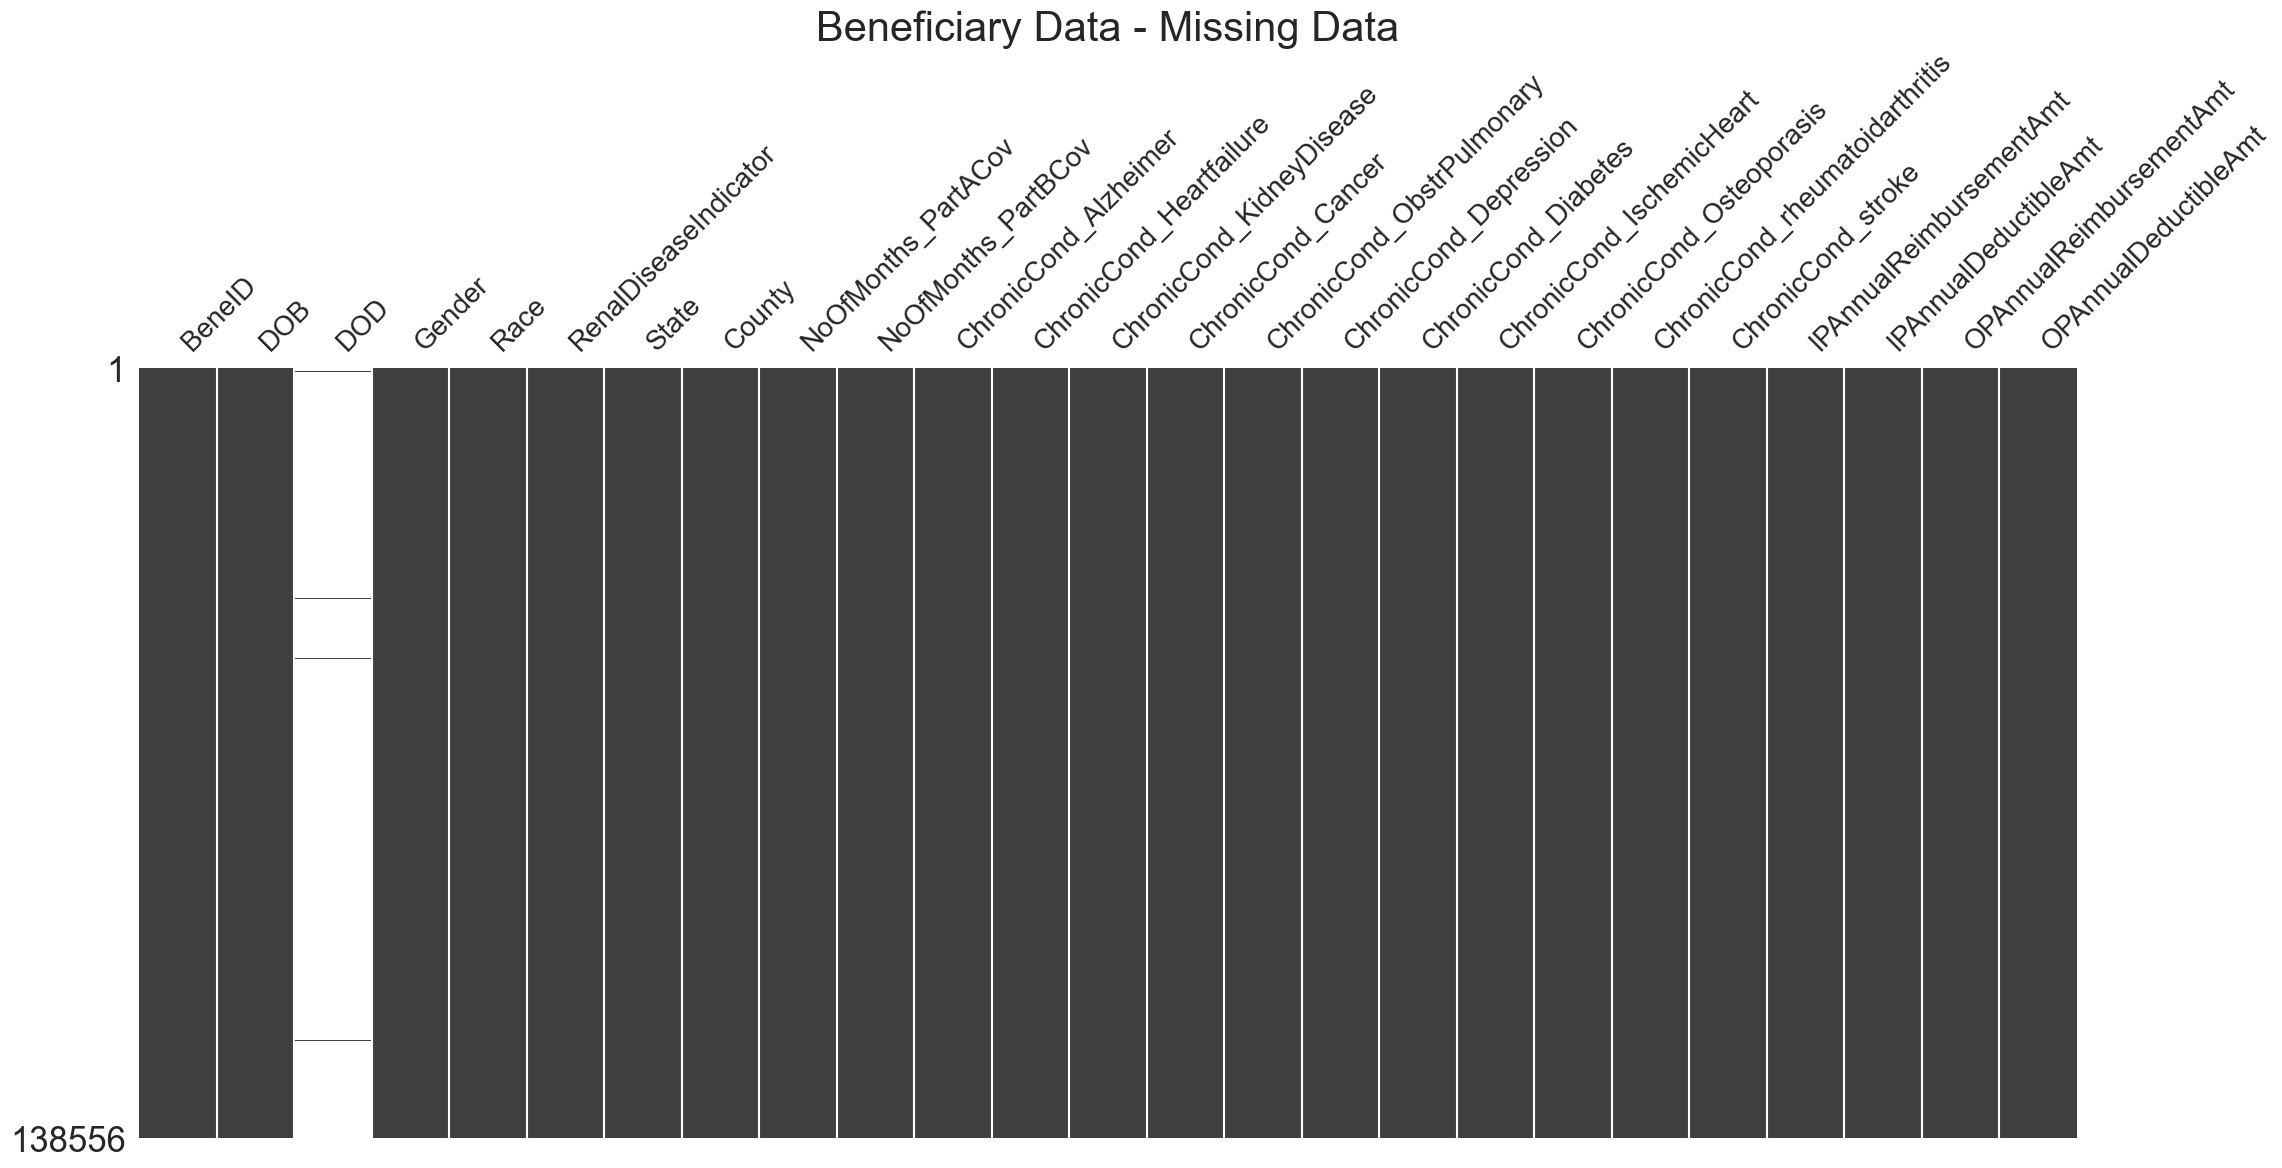

In [82]:
msno.matrix(bene, sparkline=False, fontsize=20)
plt.title('Beneficiary Data - Missing Data', fontsize=30)
plt.show()

In [83]:
print(f"beneficiary data shape is: {bene.shape}")
bene.columns

beneficiary data shape is: (138556, 25)


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [84]:
bene.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [85]:
bene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [86]:
bene['DOB'] = pd.to_datetime(bene['DOB'])
bene['DOD'] = pd.to_datetime(bene['DOD'])
bene['RenalDiseaseIndicator'] = bene['RenalDiseaseIndicator'].replace('Y', 1)
bene.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [87]:
bene['BeneID'].nunique()

138556

---

### I want to check if there's any relationship between the race, gender etc. and suspected as fraud. 

In [88]:
bene['Race'].count()

138556

In [89]:
bene['Race'].value_counts()

Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64

In [90]:
# part_of_bene = trainBene[['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 
#                  'RenalDiseaseIndicator', 'State', 'County','IPAnnualReimbursementAmt',
#                  'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
#                  'OPAnnualDeductibleAmt']]
# part_of_bene.head()


In [91]:
bene_and_inpatient = bene.merge(inpatient, on='BeneID', how='left')
print(bene_and_inpatient.shape)
bene_and_inpatient

(147741, 54)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,...,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,...,26000.0,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201.0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,...,5000.0,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750.0,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,...,5000.0,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883.0,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,BENE159194,1939-07-01,NaT,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147737,BENE159195,1938-12-01,NaT,2,1,0,49,530,12,12,1,2,2,2,2,2,1,2,2,2,2,0,0,880,100,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147738,BENE159196,1916-06-01,NaT,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147739,BENE159197,1930-01-01,NaT,1,1,0,16,560,12,12,1,1,2,2,2,2,2,1,2,2,2,0,0,2650,10,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# race_bene_inpatient = bene_and_inpatient.groupby('BeneID')['Race'].value_counts().reset_index()
# race_bene_inpatient
## test_race1 = race_bene_inpatient.merge(trainFile, on='BeneID', how='left')
## print(f'shape: {test_race1.shape}')
## test_race1.head()

In [93]:
# agg_df = test_race1.groupby(['Race', 'PotentialFraud'])['count'].sum().reset_index()
# agg_df

In [94]:
# pivot_df = agg_df.pivot(index='Race', columns='PotentialFraud', values='count').fillna(0)
# pivot_df

In [95]:
# pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
# plt.title("Race vs Fraud Potential (Stacked Counts)\n Inpatient, Beneficiary and Train.")
# plt.xlabel("Race")
# plt.xticks(rotation=0)
# plt.ylabel("Count")
# plt.legend(title='PotentialFraud', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

---

In [96]:
# state_bene_inpatient = bene_and_inpatient.groupby('Provider')['State'].value_counts().reset_index()
# test_state1 = state_bene_inpatient.merge(trainFile, on='Provider', how='left')
# print(f'shape: {test_state1.shape}')
# test_state1.head()

In [97]:
# agg_df_state = test_state1.groupby(['State', 'PotentialFraud'])['count'].sum().reset_index()
# agg_df_state

In [98]:
# pivot_df_state = agg_df_state.pivot(index='State', columns='PotentialFraud', values='count').fillna(0)
# pivot_df_state

In [99]:
# pivot_df_state.plot(kind='bar', stacked=True, figsize=(8, 6))
# plt.title("State vs Fraud Potential (Stacked Counts)\n Inpatient, Beneficiary and Train.")
# plt.xlabel("State")
# plt.xticks(rotation=90)
# plt.ylabel("Count")
# plt.legend(title='PotentialFraud', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

---

* merge the two files (Inpatient and Outpatient) on as many "same column" I can find to create the best merged dataframe
* Create merged_InOutpatient dataframe

In [100]:
merged_InOutpatient = pd.merge(inpatient, outpatient, 
         left_on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
        right_on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'], 
        how='outer'
)

In [101]:
print(f"merged_InOutpatient data shape is: {merged_InOutpatient.shape}")
merged_InOutpatient.head()

merged_InOutpatient data shape is: (558211, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,36401,0.0,NaT,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,78009,0.0,NaT,NaN,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
merged_InOutpatient[['BeneID', 'Provider']].drop_duplicates()

,BeneID,Provider
0,BENE100000,PRV57172
2,BENE100001,PRV55158
3,BENE100001,PRV54966
4,BENE100001,PRV54890
9,BENE100001,PRV52145
...,...,...
558205,BENE99999,PRV55510
558206,BENE99999,PRV55826
558207,BENE99999,PRV54670
558208,BENE99999,PRV57336


In [103]:
bene_with_provider = bene.merge(merged_InOutpatient, on='BeneID', how='inner')


In [104]:
benef_agg = bene_with_provider.groupby('Provider').agg({
    'NoOfMonths_PartACov': 'mean',
    'NoOfMonths_PartBCov': 'mean',
    'IPAnnualReimbursementAmt': 'sum',
    'OPAnnualReimbursementAmt': 'sum'
}).reset_index()
benef_agg

,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt
0,PRV51001,12.000000,12.000000,440150,65380
1,PRV51003,11.818182,11.871212,999000,353520
2,PRV51004,11.865772,11.959732,648430,327040
3,PRV51005,11.907296,11.939914,4221950,2457840
4,PRV51007,11.833333,11.833333,219600,124540
...,...,...,...,...,...
5405,PRV57759,12.000000,12.000000,110940,90770
5406,PRV57760,12.000000,11.727273,61280,32840
5407,PRV57761,12.000000,12.000000,576180,240130
5408,PRV57762,12.000000,12.000000,15000,2540


In [105]:
final_df = train.merge(benef_agg, on='Provider', how='left')
final_df

,Provider,PotentialFraud,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt
0,PRV51001,No,12.000000,12.000000,440150,65380
1,PRV51003,Yes,11.818182,11.871212,999000,353520
2,PRV51004,No,11.865772,11.959732,648430,327040
3,PRV51005,Yes,11.907296,11.939914,4221950,2457840
4,PRV51007,No,11.833333,11.833333,219600,124540
...,...,...,...,...,...,...
5405,PRV57759,No,12.000000,12.000000,110940,90770
5406,PRV57760,No,12.000000,11.727273,61280,32840
5407,PRV57761,No,12.000000,12.000000,576180,240130
5408,PRV57762,No,12.000000,12.000000,15000,2540


In [106]:
final_df_df = final_df.groupby('PotentialFraud').count().reset_index()

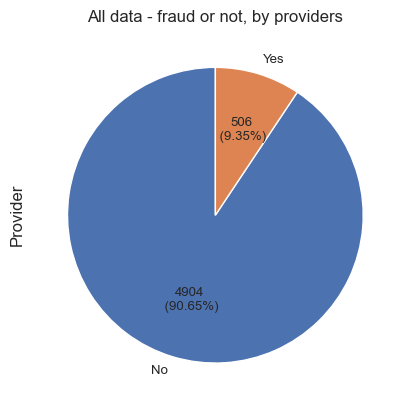

In [107]:
# Function to display absolute values
def absolute_value(val):
    a  = int(round(val/100.*final_df_df['Provider'].sum(),2))

    return f"{a}\n ({val:.2f}%)"
# Plotting the pie chart
final_df_df.set_index('PotentialFraud')['Provider'].plot.pie(autopct=absolute_value,
                                                               startangle=90, 
                                                               fontsize=9.5,
                                                               )
plt.title('All data - fraud or not, by providers')
plt.show()

### <center>  Merge Inpatient and train file into one dataframe </center>

In [108]:
inpatient.shape, train.shape

((40474, 30), (5410, 2))

In [109]:
inpatient_and_train = inpatient.merge(train, on='Provider', how='left')
inpatient_and_train.shape

(40474, 31)

In [110]:
# I want to claculate the length of Hospitalization
inpatient_and_train['Hospitalization'] = inpatient_and_train['DischargeDt'] - inpatient_and_train['AdmissionDt']
inpatient_and_train['Hospitalization'] = inpatient_and_train['Hospitalization'].dt.days

In [111]:
inpatient_and_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,Hospitalization
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,67,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,17


In [112]:
inpatient_and_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

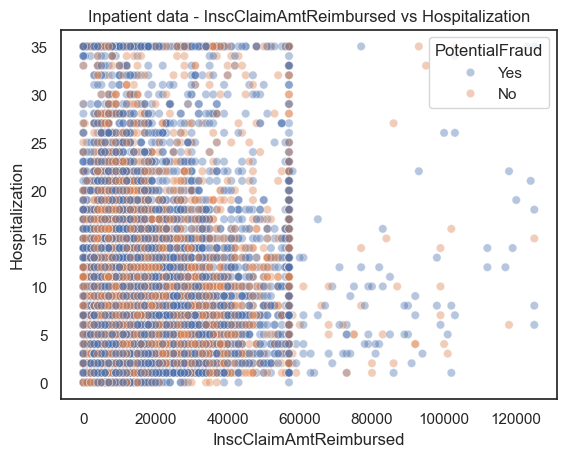

In [113]:
# group the providers by potential fraud to check the disribution 
in_test1 = inpatient_and_train.groupby('Provider')[['PotentialFraud','InscClaimAmtReimbursed','Hospitalization']].value_counts().reset_index().sort_values(ascending=False, by='count')
sns.scatterplot(data=in_test1,
                x='InscClaimAmtReimbursed',
                y='Hospitalization',
                hue='PotentialFraud',
                alpha=0.4)
plt.title('Inpatient data - InscClaimAmtReimbursed vs Hospitalization')
plt.show()

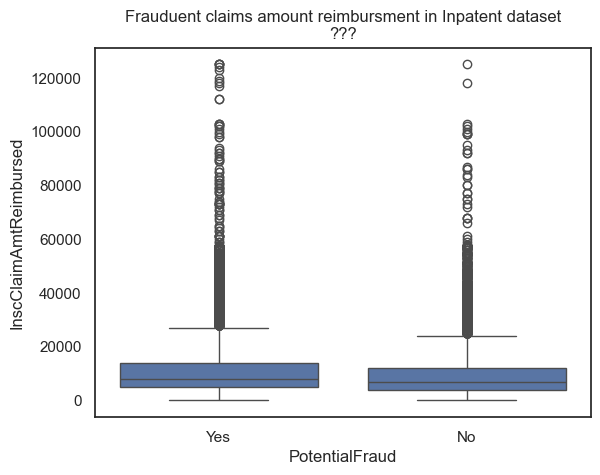

In [114]:
# test1.plot(kind='box',y='InscClaimAmtReimbursed',x='PotentialFraud')
sns.set_theme(style='white')
sns.boxplot(x=in_test1['PotentialFraud'], 
           y=in_test1['InscClaimAmtReimbursed'])
plt.title('Frauduent claims amount reimbursment in Inpatent dataset\n???')
plt.show()

In [115]:
in_test1.describe()

,InscClaimAmtReimbursed,Hospitalization,count
count,33314.000000,33314.000000,33314.000000
mean,10962.226691,6.173561,1.214925
std,11044.863306,5.999616,0.676797
min,0.000000,0.000000,1.000000
25%,4000.000000,2.000000,1.000000
50%,8000.000000,4.000000,1.000000
75%,13000.000000,8.000000,1.000000
max,125000.000000,35.000000,16.000000


In [116]:
test2 = inpatient_and_train.groupby('Provider')['PotentialFraud'].value_counts().reset_index().sort_values(ascending=False, by='count')
test2 = test2[['Provider','PotentialFraud']]
test2

,Provider,PotentialFraud
388,PRV52019,Yes
1408,PRV55462,Yes
1066,PRV54367,Yes
896,PRV53706,Yes
1355,PRV55209,Yes
...,...,...
862,PRV53515,No
863,PRV53516,No
871,PRV53600,No
1703,PRV56474,No


In [117]:
test2.duplicated().sum()

0

In [118]:
fraud_or_not = test2.groupby('PotentialFraud').count().reset_index()

In [119]:
fraud_or_not

,PotentialFraud,Provider
0,No,1652
1,Yes,440


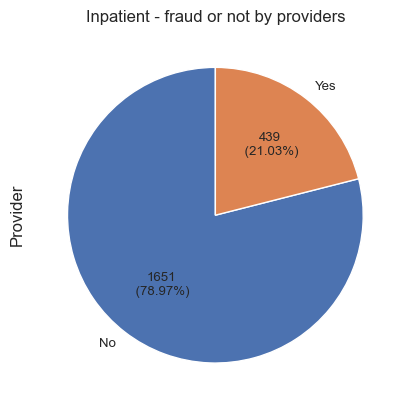

In [120]:
# Function to display absolute values
def absolute_value(val):
    a  = int(val/100.*fraud_or_not['Provider'].sum())

    return f"{a}\n ({val:.2f}%)"
# Plotting the pie chart
fraud_or_not.set_index('PotentialFraud')['Provider'].plot.pie(autopct=absolute_value,
                                                               startangle=90, fontsize=9.5)
plt.title('Inpatient - fraud or not by providers')
plt.show()

In [121]:
# plt.pie(fraud_or_not['Provider'],
#         labels = fraud_or_not.index,
#         autopct='%1.1f%%',
#         startangle=90
#         )
# plt.title('Ratio of Fraud and non-fraud in inpatient')
# # plt.xlabel('Around 21% of the claims are potential frauds')
# plt.show()

------------------------

In [122]:
inpatient_and_train.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,Hospitalization
12703,BENE57873,CLM78826,2009-12-08,2009-12-10,PRV54925,3000,PHY385233,NaN,NaN,2009-12-08,5362,1068.0,2009-12-10,395,5533,412,3051,30302,3336,53540,5853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2


In [123]:
inpatient_and_train.groupby('Provider')['AttendingPhysician'].count().reset_index()

,Provider,AttendingPhysician
0,PRV51001,5
1,PRV51003,62
2,PRV51007,3
3,PRV51008,2
4,PRV51011,1
...,...,...
2087,PRV57719,4
2088,PRV57728,1
2089,PRV57729,11
2090,PRV57732,11


In [124]:
inpatient_and_train.groupby('ClmAdmitDiagnosisCode')['PotentialFraud'].value_counts().reset_index().head(20)

,ClmAdmitDiagnosisCode,PotentialFraud,count
0,0030,No,1
1,0030,Yes,1
2,0059,Yes,1
3,00845,No,25
4,00845,Yes,23
5,0085,Yes,1
6,00863,No,1
7,0088,Yes,10
8,0088,No,7
9,0090,No,3


In [125]:
attending_test2 = inpatient_and_train.groupby('AttendingPhysician')['PotentialFraud'].value_counts().reset_index()
attending_test2.head()

,AttendingPhysician,PotentialFraud,count
0,PHY311002,Yes,1
1,PHY311023,No,1
2,PHY311028,Yes,1
3,PHY311035,No,1
4,PHY311056,No,1


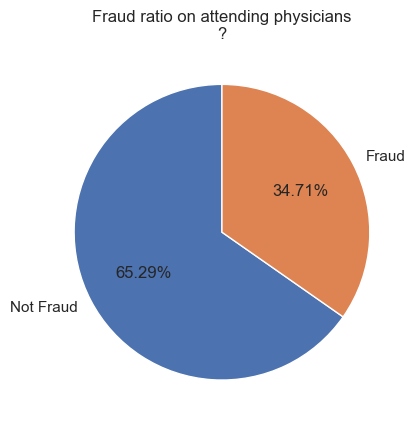

In [126]:
attending_test2 = inpatient_and_train.groupby('AttendingPhysician')['PotentialFraud'].value_counts().reset_index()
plt.pie(attending_test2['PotentialFraud'].value_counts(),
        labels=['Not Fraud', 'Fraud'],
        autopct='%1.2f%%',
        startangle=90
        )
plt.title('Fraud ratio on attending physicians\n?')
plt.show()


In [127]:
attending_test2

,AttendingPhysician,PotentialFraud,count
0,PHY311002,Yes,1
1,PHY311023,No,1
2,PHY311028,Yes,1
3,PHY311035,No,1
4,PHY311056,No,1
...,...,...,...
11670,PHY434121,No,1
11671,PHY434136,No,1
11672,PHY434139,No,1
11673,PHY434142,Yes,1


In [128]:
attending_test2.duplicated().sum()

0

In [129]:
num_of_claim_by_provider = inpatient_and_train.groupby('Provider')['ClaimID'].count().reset_index()
num_of_claim_by_provider

,Provider,ClaimID
0,PRV51001,5
1,PRV51003,62
2,PRV51007,3
3,PRV51008,2
4,PRV51011,1
...,...,...
2087,PRV57719,4
2088,PRV57728,1
2089,PRV57729,11
2090,PRV57732,11


Text(0.5, 1.0, 'Number of claim for for each provider')

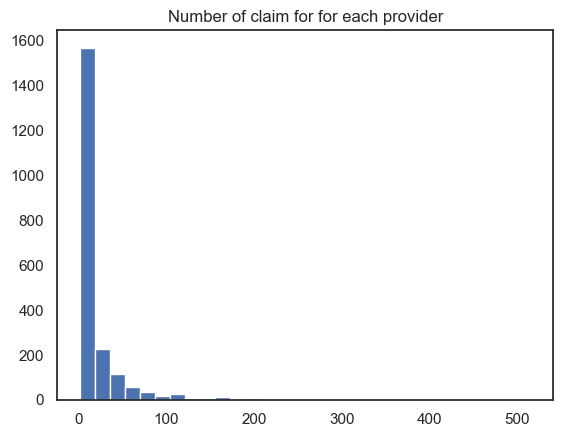

In [130]:
plt.hist(num_of_claim_by_provider['ClaimID'], bins=30)
plt.title('Number of claim for for each provider')

---

# Checking the same things with outpatients

In [131]:
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [132]:
outpatient_and_train = outpatient.merge(train, on='Provider', how='left')
print(outpatient_and_train.shape)
outpatient_and_train.head(2)

(517737, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No


In [133]:
# I want to claculate the length of Hospitalization
outpatient_and_train['ClaimLength'] = outpatient_and_train['ClaimEndDt'] - outpatient_and_train['ClaimStartDt']
outpatient_and_train['ClaimLength'] = outpatient_and_train['ClaimLength'].dt.days

In [134]:
out_test1= outpatient_and_train.groupby('Provider')['PotentialFraud'].value_counts().reset_index()
out_test1

,Provider,PotentialFraud,count
0,PRV51001,No,20
1,PRV51003,Yes,70
2,PRV51004,No,149
3,PRV51005,Yes,1165
4,PRV51007,No,69
...,...,...,...
5007,PRV57759,No,28
5008,PRV57760,No,22
5009,PRV57761,No,82
5010,PRV57762,No,1


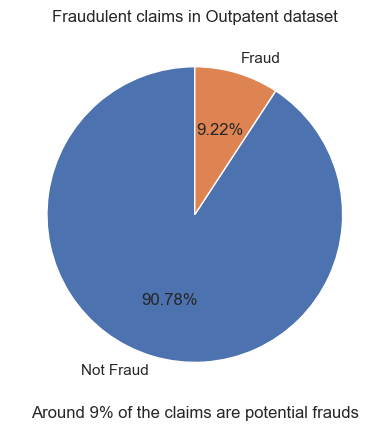

In [135]:
plt.pie(out_test1['PotentialFraud'].value_counts(),
        labels=['Not Fraud', 'Fraud'],
        autopct='%1.2f%%',
        startangle=90
        )
plt.title('Fraudulent claims in Outpatent dataset')
plt.xlabel('Around 9% of the claims are potential frauds')
plt.show()

In [136]:
ttl_out_fraud = out_test1.groupby('Provider')['PotentialFraud'].value_counts().reset_index()
ttl_out_fraud = ttl_out_fraud[['Provider','PotentialFraud']]
ttl_out_fraud

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5007,PRV57759,No
5008,PRV57760,No
5009,PRV57761,No
5010,PRV57762,No


In [137]:
out_fraud_or_not = ttl_out_fraud.groupby('PotentialFraud').count().reset_index()
out_fraud_or_not#.duplicated().sum()

,PotentialFraud,Provider
0,No,4550
1,Yes,462


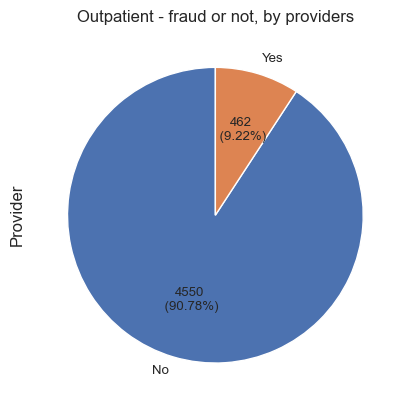

In [138]:
# Function to display absolute values
def absolute_value(val):
    a  = int(round(val/100.*out_fraud_or_not['Provider'].sum(),2))

    return f"{a}\n ({val:.2f}%)"
# Plotting the pie chart
out_fraud_or_not.set_index('PotentialFraud')['Provider'].plot.pie(autopct=absolute_value,
                                                               startangle=90, 
                                                               fontsize=9.5,
                                                               )
plt.title('Outpatient - fraud or not, by providers')
plt.show()

In [139]:
outpatient_and_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimLength
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,0


In [140]:
outpatient_and_train['ClaimLength'].value_counts().reset_index().sort_values(
    by='ClaimLength', ascending=True)#.plot(kind='bar',x='ClaimLength', y='count')
# plt.title('')

,ClaimLength,count
0,0,453348
2,1,11960
3,2,4366
5,3,2597
7,4,2238
8,5,1511
10,6,1306
6,7,2564
11,8,1189
9,9,1378


In [141]:
outpatient_and_train.groupby('Provider')[['PotentialFraud','ClaimLength']].value_counts().reset_index()

,Provider,PotentialFraud,ClaimLength,count
0,PRV51001,No,0,17
1,PRV51001,No,1,2
2,PRV51001,No,9,1
3,PRV51003,Yes,0,58
4,PRV51003,Yes,20,6
...,...,...,...,...
26182,PRV57763,No,7,1
26183,PRV57763,No,8,1
26184,PRV57763,No,12,1
26185,PRV57763,No,13,1


In [142]:
full_merged_train = merged_InOutpatient.merge(train, on='Provider', how='left')
print(full_merged_train.shape)
full_merged_train.head()

(558211, 31)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,36401,0.0,NaT,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,78009,0.0,NaT,NaN,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [143]:
ttl_fraud = full_merged_train.groupby('Provider')['PotentialFraud'].value_counts().reset_index()
ttl_fraud = ttl_fraud[['Provider','PotentialFraud']]
ttl_fraud


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [144]:
fraud_or_not2 = ttl_fraud.groupby('PotentialFraud').count().reset_index()
fraud_or_not2

,PotentialFraud,Provider
0,No,4904
1,Yes,506


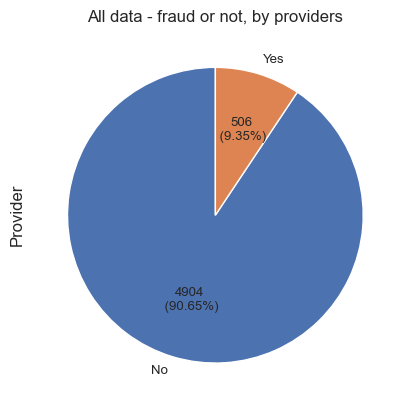

In [145]:
# Function to display absolute values
def absolute_value(val):
    a  = int(round(val/100.*fraud_or_not2['Provider'].sum(),2))

    return f"{a}\n ({val:.2f}%)"
# Plotting the pie chart
fraud_or_not2.set_index('PotentialFraud')['Provider'].plot.pie(autopct=absolute_value,
                                                               startangle=90, 
                                                               fontsize=9.5,
                                                               )
plt.title('All data - fraud or not, by providers')
plt.show()

In [146]:
bene_and_outpatient = bene.merge(outpatient_and_train, on='BeneID', how='left')
bene_and_outpatient.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,...,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,ClaimLength
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,...,PRV56011,30.0,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,Yes,0.0


In [147]:
bene_and_outpatient.shape


(522313, 53)

In [148]:
race_bene_outpatient = bene_and_outpatient.groupby('Provider')['Race'].value_counts().reset_index()
test_race2 = race_bene_outpatient.merge(train, on='Provider', how='left')
print(f'shape: {test_race2.shape}')
test_race2.head()

shape: (12687, 4)


,Provider,Race,count,PotentialFraud
0,PRV51001,1,16,No
1,PRV51001,2,4,No
2,PRV51003,1,58,Yes
3,PRV51003,2,11,Yes
4,PRV51003,5,1,Yes


In [149]:
agg_df2 = test_race2.groupby(['Race', 'PotentialFraud'])['count'].sum().reset_index()
agg_df2

,Race,PotentialFraud,count
0,1,No,278301
1,1,Yes,158609
2,2,No,33584
3,2,Yes,17854
4,3,No,10164
5,3,Yes,8192
6,5,No,6294
7,5,Yes,4739


In [150]:
pivot_df2 = agg_df2.pivot(index='Race', columns='PotentialFraud', values='count').fillna(0)
pivot_df2

PotentialFraud,No,Yes
Race,,
1,278301,158609
2,33584,17854
3,10164,8192
5,6294,4739


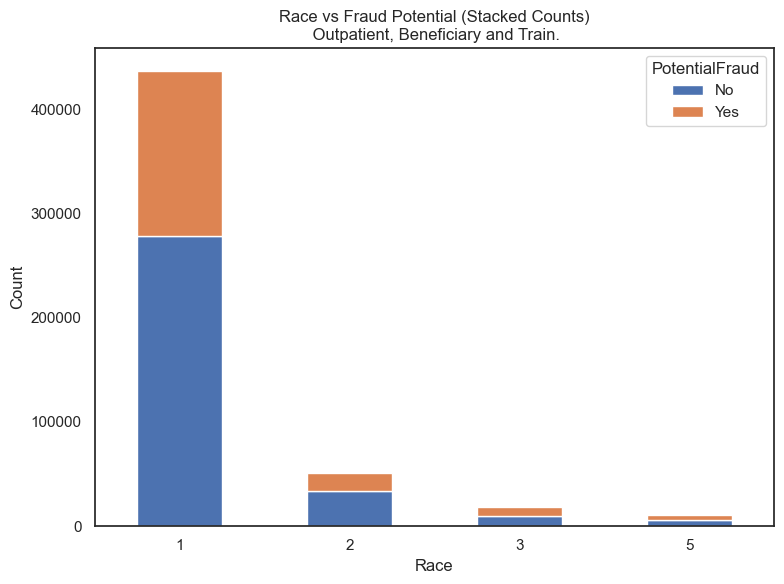

In [151]:
pivot_df2.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Race vs Fraud Potential (Stacked Counts)\n Outpatient, Beneficiary and Train.")
plt.xlabel("Race")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title='PotentialFraud', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

---

In [152]:
state_bene_outpatient = bene_and_outpatient.groupby('Provider')['State'].value_counts().reset_index()
test_state2 = state_bene_outpatient.merge(train, on='Provider', how='left')
print(f'shape: {test_state2.shape}')
test_state2.head()

shape: (13253, 4)


,Provider,State,count,PotentialFraud
0,PRV51001,1,20,No
1,PRV51003,1,43,Yes
2,PRV51003,10,19,Yes
3,PRV51003,11,8,Yes
4,PRV51004,1,75,No


In [153]:
agg_df3 = test_state2.groupby(['State', 'PotentialFraud'])['count'].sum().reset_index()
agg_df3

,State,PotentialFraud,count
0,1,No,6269
1,1,Yes,3191
2,2,No,505
3,2,Yes,174
4,3,No,7009
...,...,...,...
99,52,Yes,1523
100,53,No,597
101,53,Yes,432
102,54,No,3080


In [154]:
pivot_df3 = agg_df3.pivot(index='State', columns='PotentialFraud', values='count').fillna(0)
pivot_df3

PotentialFraud,No,Yes
State,,
1,6269,3191
2,505,174
3,7009,1536
4,5377,1641
5,19533,28349
6,3435,3291
7,3997,991
8,868,586
9,388,156


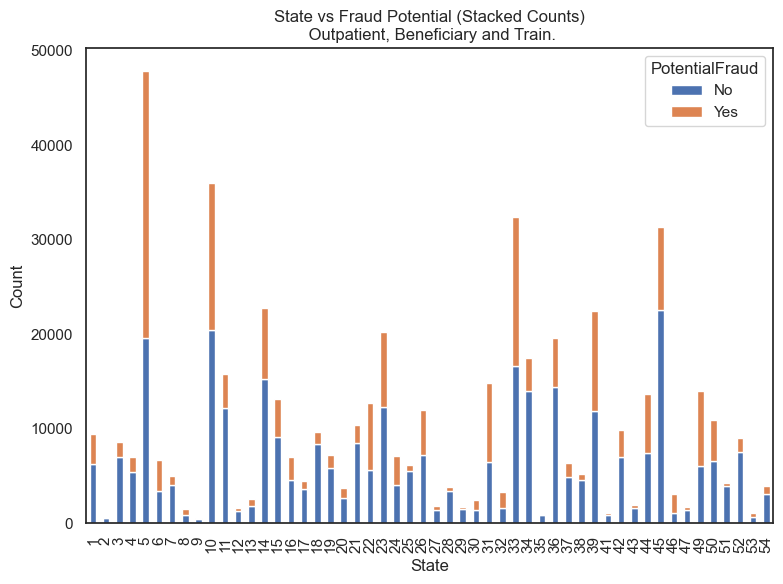

In [155]:
pivot_df3.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("State vs Fraud Potential (Stacked Counts)\n Outpatient, Beneficiary and Train.")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend(title='PotentialFraud', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

---

In [156]:
gender_bene_outpatient = bene_and_outpatient.groupby('Provider')['Gender'].value_counts().reset_index()
test_gender = gender_bene_outpatient.merge(train, on='Provider', how='left')
print(f'shape: {test_gender.shape}')
test_gender.head()

shape: (9618, 4)


,Provider,Gender,count,PotentialFraud
0,PRV51001,2,13,No
1,PRV51001,1,7,No
2,PRV51003,2,37,Yes
3,PRV51003,1,33,Yes
4,PRV51004,2,103,No


In [157]:
agg_df4 = test_gender.groupby(['Gender', 'PotentialFraud'])['count'].sum().reset_index()
agg_df4

,Gender,PotentialFraud,count
0,1,No,138249
1,1,Yes,79641
2,2,No,190094
3,2,Yes,109753


In [158]:
pivot_df4 = agg_df4.pivot(index='Gender', columns='PotentialFraud', values='count').fillna(0)
pivot_df4

PotentialFraud,No,Yes
Gender,,
1,138249,79641
2,190094,109753


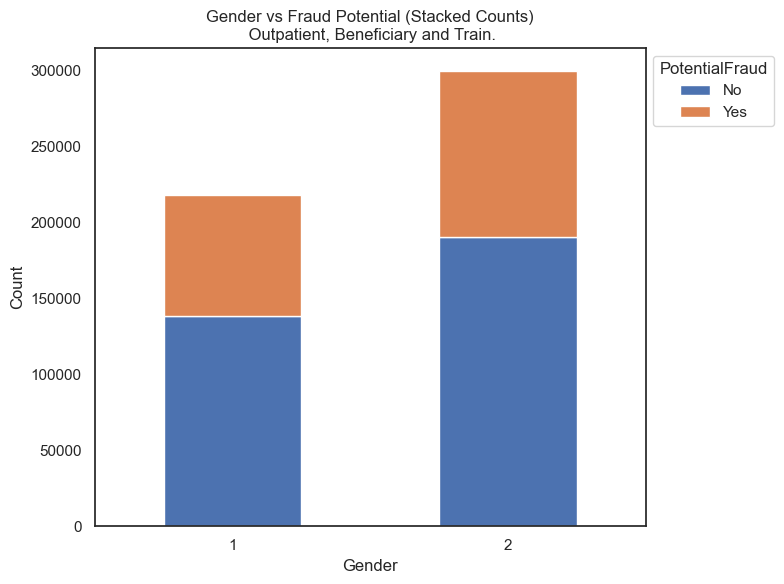

In [159]:
pivot_df4.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Gender vs Fraud Potential (Stacked Counts)\n Outpatient, Beneficiary and Train.")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title='PotentialFraud', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [160]:
# Helper functions for plotting and get pivot tables results

def stack_bar_plot(data, x, hue, title):
    """
    data: DataDrame
    x: str, x-axis variable
    hue: str, variable that will produce new bar
    title: str, title of the plot
    """

    agg_df = data.groupby([x, hue])['count'].sum().reset_index()
    pivot_df = agg_df.pivot(index=x, columns=hue, values='count').fillna(0)
    pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(title)
    plt.xlabel(x)
    plt.xticks(rotation=0)
    plt.ylabel("Count")
    plt.legend(title=hue, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

def pivot_tables(data, x, hue):
    """
    data: DataDrame
    x: str, x-axis variable
    hue: str, variable that will produce new bar
    """
    agg_df = data.groupby([x, hue])['count'].sum().reset_index()
    pivot_df = agg_df.pivot(index=x, columns=hue, values='count').fillna(0)
    return pivot_df

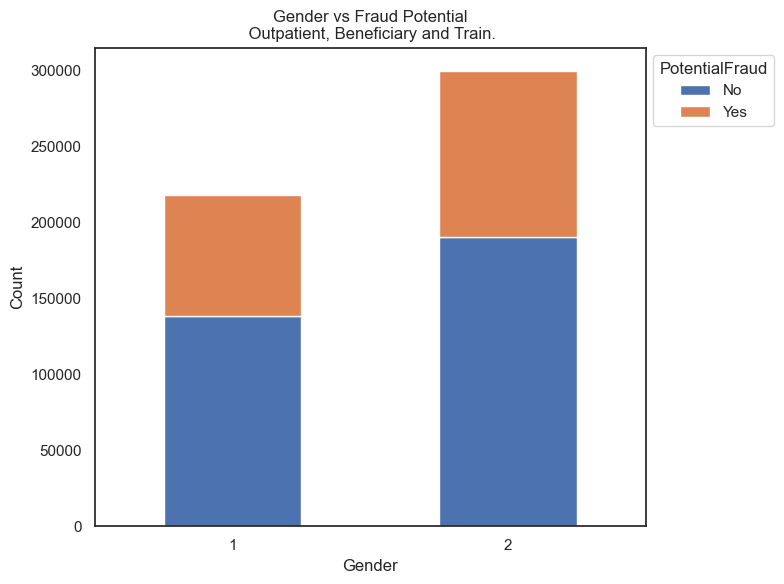

In [161]:
stack_bar_plot(test_gender, 'Gender', 'PotentialFraud', 'Gender vs Fraud Potential\n Outpatient, Beneficiary and Train.')

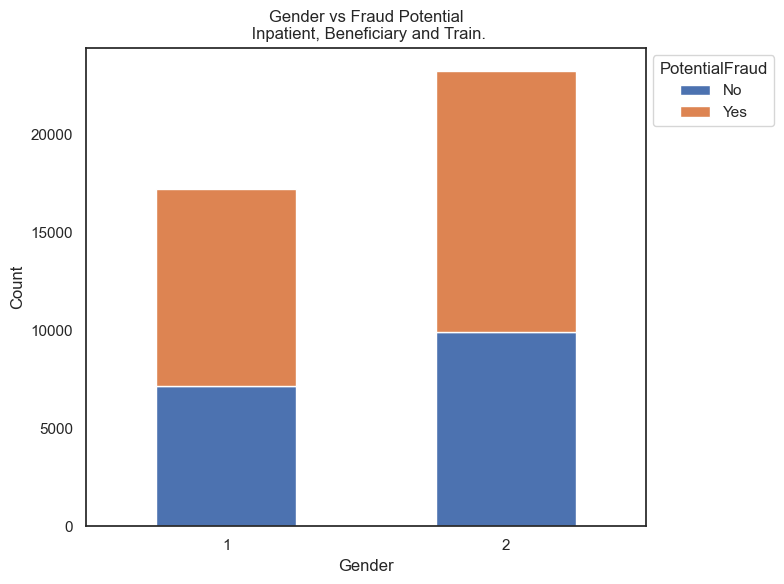

In [162]:
gender_bene_inpatient = bene_and_inpatient.groupby('Provider')['Gender'].value_counts().reset_index()
test_gender2 = gender_bene_inpatient.merge(train, on='Provider', how='left')
stack_bar_plot(test_gender2, 'Gender', 'PotentialFraud', 'Gender vs Fraud Potential\n Inpatient, Beneficiary and Train.')


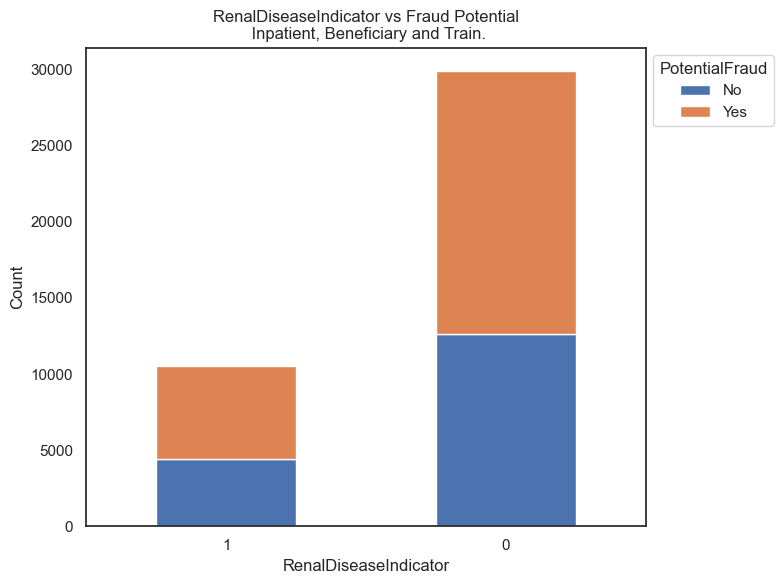

In [163]:
renal_bene_inpatient = bene_and_inpatient.groupby('Provider')['RenalDiseaseIndicator'].value_counts().reset_index()
test_renal = renal_bene_inpatient.merge(train, on='Provider', how='left')
stack_bar_plot(test_renal, 'RenalDiseaseIndicator', 'PotentialFraud', 'RenalDiseaseIndicator vs Fraud Potential\n Inpatient, Beneficiary and Train.')

---

### pivit function to get the `Fraud` and `Not Fraud` in a simple format
pivot_tables(data, x-axis, hue)

In [164]:
pivot_tables(test_renal, 'RenalDiseaseIndicator', 'PotentialFraud')

PotentialFraud,No,Yes
RenalDiseaseIndicator,,
1,4422,6111
0,12650,17291


In [165]:
pivot_tables(test_gender, 'Gender', 'PotentialFraud')


PotentialFraud,No,Yes
Gender,,
1,138249,79641
2,190094,109753


---

In [166]:
inpatient_and_train['InscClaimAmtReimbursed'].mean()

10087.884073726344

In [167]:
outpatient_and_train['InscClaimAmtReimbursed'].mean()

286.33479932861667

In [168]:
inpatient_and_train['DeductibleAmtPaid'].value_counts()

DeductibleAmtPaid
1068.0    39575
Name: count, dtype: int64

In [169]:
outpatient_and_train['DeductibleAmtPaid'].value_counts().reset_index()

,DeductibleAmtPaid,count
0,0,496701
1,100,4582
2,70,2420
3,60,2065
4,40,2045
5,80,2024
6,50,1969
7,20,1406
8,30,1336
9,90,1245


In [170]:
bene.groupby('BeneID')['IPAnnualDeductibleAmt'].value_counts().reset_index().sort_values(ascending=False, by='IPAnnualDeductibleAmt').head(15)

,BeneID,IPAnnualDeductibleAmt,count
61044,BENE17030,38272,1
137615,BENE99000,37204,1
71708,BENE28463,36136,1
29536,BENE129601,36136,1
34167,BENE134105,36136,1
94509,BENE52900,35204,1
38848,BENE138663,35068,1
124354,BENE84825,35068,1
80805,BENE38197,35068,1
27115,BENE127252,35068,1


In [171]:
print(f"Total Deductible amount in outpatient dataset: {outpatient_and_train['DeductibleAmtPaid'].sum():,}")
print(f"Total Deductible amount in inpatient dataset: {inpatient_and_train['DeductibleAmtPaid'].sum():,}")

Total Deductible amount in outpatient dataset: 1,438,912
Total Deductible amount in inpatient dataset: 42,266,100.0


In [172]:
# total_claims_per_beneficiary = InpatientAndTrain['']

***

In [173]:
bene.BeneID.nunique()

138556

In [174]:
bene.sample()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
105322,BENE123678,1946-04-01,NaT,1,1,0,24,180,12,12,1,1,2,1,1,2,1,1,2,2,2,0,0,570,90


In [175]:
bene_and_inpatient[['BeneID', 'Provider']]

,BeneID,Provider
0,BENE11001,PRV55912
1,BENE11001,PRV55907
2,BENE11001,PRV56046
3,BENE11002,NaN
4,BENE11003,NaN
...,...,...
147736,BENE159194,NaN
147737,BENE159195,NaN
147738,BENE159196,NaN
147739,BENE159197,NaN


In [176]:
bene_and_inpatient.groupby('Provider')['IPAnnualReimbursementAmt'].sum().reset_index()

,Provider,IPAnnualReimbursementAmt
0,PRV51001,389510
1,PRV51003,787190
2,PRV51007,35130
3,PRV51008,37500
4,PRV51011,5000
...,...,...
2087,PRV57719,100840
2088,PRV57728,6000
2089,PRV57729,187810
2090,PRV57732,158130
